# Подключаем библиотеки

In [ ]:
import pandas as pd
import numpy as np
#from datetime import date, timedelta
import warnings
from matplotlib import pyplot as plt
#import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import itertools
#import random
from datetime import datetime

#import time
#from tqdm import tqdm
import math as m

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime

from sklearn.metrics import r2_score
import ml_metrics as metrics

In [ ]:
import statsmodels as sm
#from statsmodels.iolib.table import SimpleTable

In [ ]:
from stldecompose import decompose, forecast
#from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)

In [ ]:
import matplotlib
matplotlib.colors
matplotlib.colors.rgb_to_hsv
matplotlib.colors.to_rgba
matplotlib.figure.Figure.get_size_inches
matplotlib.figure.Figure.subplots_adjust
matplotlib.axes.Axes.text
matplotlib.axes.Axes.hlines

<function matplotlib.axes._axes.Axes.hlines>

In [ ]:
warnings.filterwarnings("ignore")

# Подгружаем данные

In [ ]:
df = pd.read_csv("train.csv")
df 

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
35990,35991,NaN,Zimbabwe,2020-05-11,36.0,4.0
35991,35992,NaN,Zimbabwe,2020-05-12,36.0,4.0
35992,35993,NaN,Zimbabwe,2020-05-13,37.0,4.0
35993,35994,NaN,Zimbabwe,2020-05-14,37.0,4.0


In [ ]:
df_date = df.groupby('Date', as_index=False).sum()
df_date

,Date,Id,ConfirmedCases,Fatalities
0,2020-01-22,5615533,554.0,17.0
1,2020-01-23,5615846,653.0,18.0
2,2020-01-24,5616159,939.0,26.0
3,2020-01-25,5616472,1432.0,42.0
4,2020-01-26,5616785,2113.0,56.0
...,...,...,...,...
110,2020-05-11,5649963,4176589.0,286293.0
111,2020-05-12,5650276,4260955.0,291924.0
112,2020-05-13,5650589,4345950.0,297155.0
113,2020-05-14,5650902,4440974.0,302370.0


# Метрика Confirmed Cases по всему миру


Сделаем метрику ConfirmedCases2Day - заболевшие за 1 день

# Расчет метрики

In [ ]:
my_list = [1]
for x in range(1,115):
    k = df_date['ConfirmedCases'][x] - df_date['ConfirmedCases'][x-1]
    my_list.append(k)

In [ ]:
df_date['ConfirmedCases2Day'] = my_list

In [ ]:
df_date

,Date,Id,ConfirmedCases,Fatalities,ConfirmedCases2Day
0,2020-01-22,5615533,554.0,17.0,1.0
1,2020-01-23,5615846,653.0,18.0,99.0
2,2020-01-24,5616159,939.0,26.0,286.0
3,2020-01-25,5616472,1432.0,42.0,493.0
4,2020-01-26,5616785,2113.0,56.0,681.0
...,...,...,...,...,...
110,2020-05-11,5649963,4176589.0,286293.0,75746.0
111,2020-05-12,5650276,4260955.0,291924.0,84366.0
112,2020-05-13,5650589,4345950.0,297155.0,84995.0
113,2020-05-14,5650902,4440974.0,302370.0,95024.0


In [ ]:
df_date['Date'] = pd.to_datetime(df_date['Date'])

**Посмотрим на наш график**

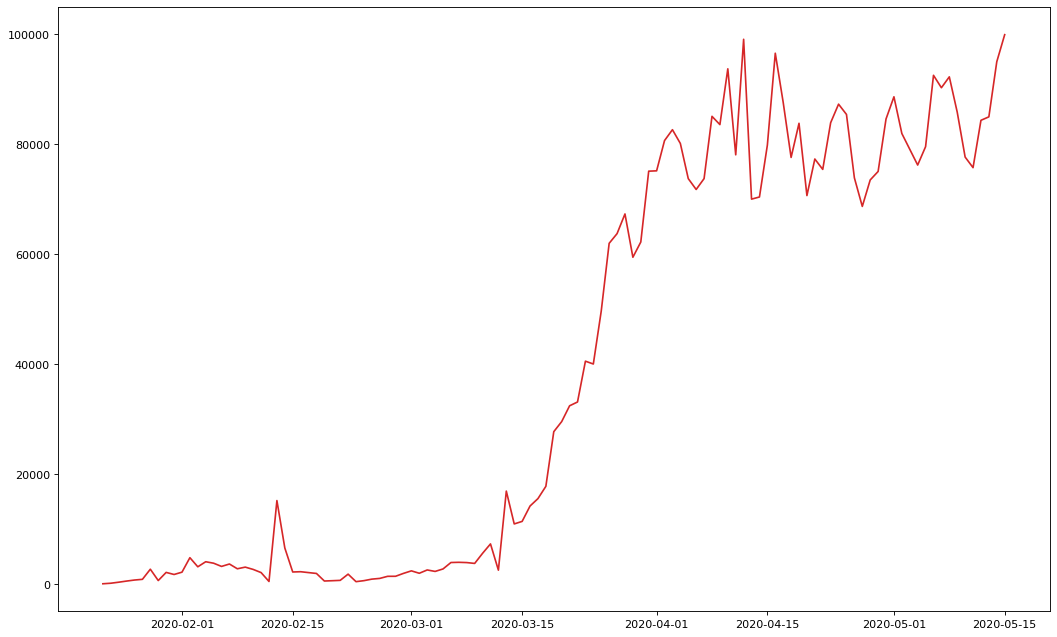

In [ ]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot(df_date['Date'].values.astype('datetime64[D]'), df_date['ConfirmedCases2Day'].values , color='tab:red')
plt.show()

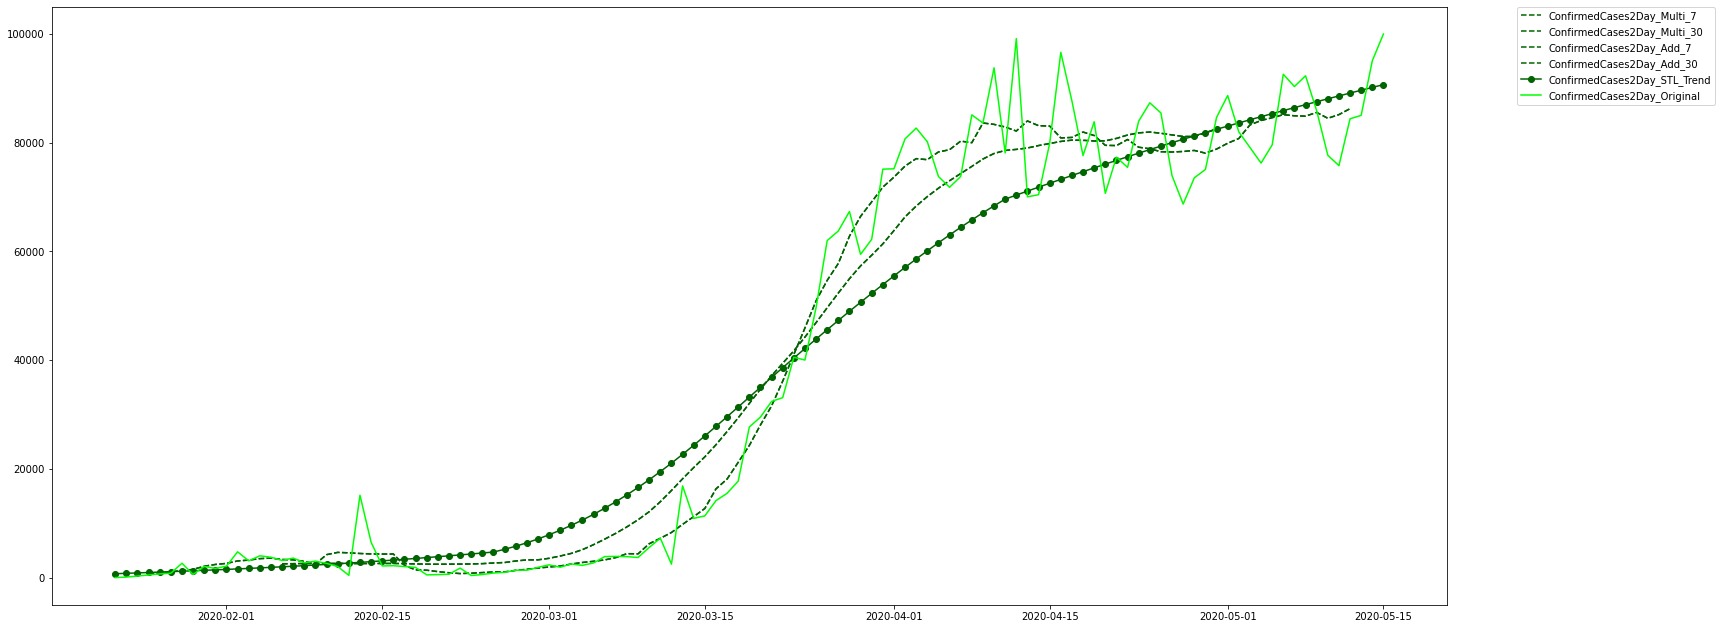

In [ ]:
dta = df_date
dta = dta.set_index('Date')

# 1. Multiplicative 
# 1.1. Weekly
res_ymw = seasonal_decompose(dta['ConfirmedCases2Day'], model='multiplicative', freq = 7)
# 1.2. Monthly
res_ymm = seasonal_decompose(dta['ConfirmedCases2Day'], model='multiplicative', freq = 30)

# 2. Additive 
# 2.1. Weekly
res_yaw = seasonal_decompose(dta['ConfirmedCases2Day'], model='additive', freq = 7)
# 2.2. Monthly
res_yam = seasonal_decompose(dta['ConfirmedCases2Day'], model='additive', freq = 30)

# 3. STL-Lib Decompopsition by LOESS - Logistic Regression:
stl_y = decompose(dta[['ConfirmedCases2Day']], period=7)


res_y = dta.ConfirmedCases2Day


# Plotting Charts:
plt.figure(figsize=(25,11))
plt.plot(res_ymw.trend, '--', label='ConfirmedCases2Day_Multi_7', color='darkgreen')
plt.plot(res_ymm.trend, '--', label='ConfirmedCases2Day_Multi_30', color='darkgreen')
plt.plot(res_yaw.trend, '--', label='ConfirmedCases2Day_Add_7', color='darkgreen')
plt.plot(res_yam.trend, '--', label='ConfirmedCases2Day_Add_30', color='darkgreen')
plt.plot(stl_y.trend, '-o', label='ConfirmedCases2Day_STL_Trend', color='darkgreen')

plt.plot(dta['ConfirmedCases2Day'], '-', label='ConfirmedCases2Day_Original', color='lime')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
test = sm.tsa.stattools.adfuller(dta.ConfirmedCases2Day.values[3:-3] - res_ymw.trend.dropna())
print('adf: ', test[0]) 
print('p-value: ', test[1]) 
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Eсть единичные корни, ряд не стационарен') 
else:
    print('Eдиничных корней нет, ряд стационарен') 

adf:  -3.475515407409136
p-value:  0.008638631636736878
Critical values:  {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}
Eдиничных корней нет, ряд стационарен


MAPE :  1.77 %
MAE :  1035.5684856733749


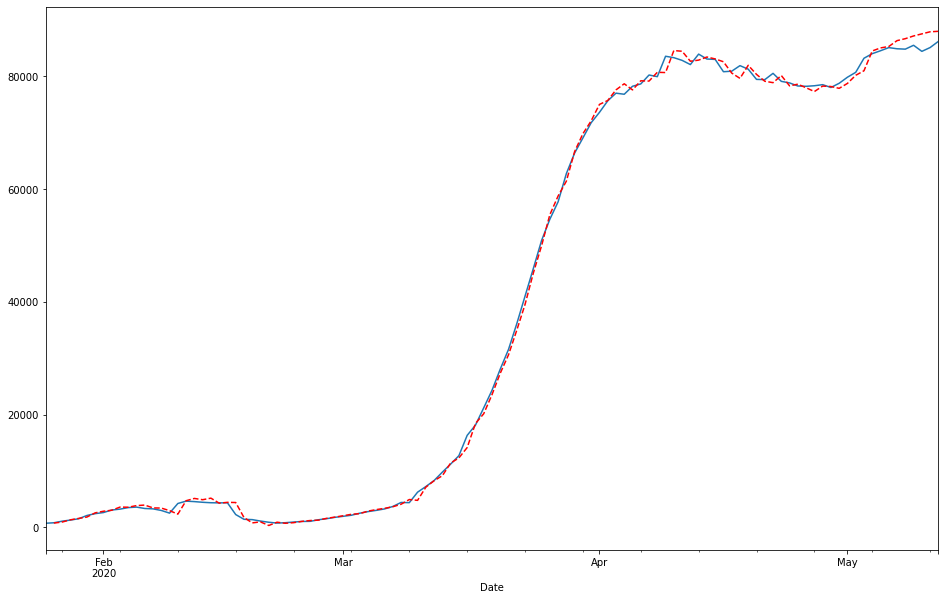

In [ ]:
src_data_model = res_ymw.trend['2020-01-25':'2020-05-05'].apply(lambda x: int(x))

model = sm.tsa.arima_model.ARIMA(src_data_model, (5,0,1))
model = model.fit()
model.predict(start='2020-04-25', end='2020-05-05')

from sklearn.metrics import r2_score
import ml_metrics as metrics

pred = model.predict('2020-01-26', '2020-05-12')
trn = res_ymw.trend['2020-01-25':'2020-05-11']

Error = np.sum(np.abs(np.subtract(trn,pred)))
Average = np.sum(trn)
MAPE = (Error/Average)*100


print('MAPE : ', str(round(MAPE, 2)), '%')
print('MAE : ', metrics.mae(trn[1:115], pred[1:115])) 

res_ymw.trend['2020-01-25':'2020-05-12'].apply(lambda x: int(x)).plot(figsize=(16,10))

pred.plot(style='r--')
plt.show()


# Показатель Херста

In [ ]:
hurst_df = pd.DataFrame() 
hurst_df['TAU'] = 0 
hurst_df['RS'] = 0

In [ ]:
def preparation(df):    
    df = df.drop(['Id', 'ConfirmedCases', 'Fatalities'], 1)#delete trash
    return df

def row_number(df, shape):
    df['row_number'] = 0
    k = 1#счетчик
    now_shape = 0#счетчик 
    for row in df.index:
        df['row_number'][row] = k
        now_shape += 1
        if now_shape == shape:
            k += 1
            now_shape = 0
    return df

def range_hurst(df)-> list:
    list_range = []
    size = len(df)
    for i in range(size):
        list_range.append(int(size))
        size = size/2
        if size <= 2:
            break
    return list_range

In [ ]:
def hurst(hurst_df, df):
    
    df = preparation(df)#убираем мусор
    main_df = df#копируем дата-фрейм
    my_range = range_hurst(df)
    for x in my_range: #перебираем TAU
        
        df = main_df
        df = row_number(df, shape = x)
        df_mean = df.groupby(['row_number']).mean()
        
        df_mean.rename(columns = {'ConfirmedCases2Day': 'mean_ConfirmedCases2Day'}, inplace = True)
        df = df.merge(df_mean, how='inner', left_on='row_number', right_on='row_number')
        
        #Накопленное знач.
        df['accumulated_value'] = df['ConfirmedCases2Day'] - df['mean_ConfirmedCases2Day']
        df = df[df['accumulated_value'] != 0]
        
        #Вычисляем R(размах)
        df_R_min = df.groupby(['row_number']).min()
        df_R_min = df_R_min.drop(['ConfirmedCases2Day','mean_ConfirmedCases2Day'], axis = 1)
        df_R_min.rename(columns = {'accumulated_value': 'R_min'}, inplace = True)
        df_R_max = df.groupby(['row_number']).max()
        df_R_max = df_R_max.drop(['ConfirmedCases2Day','ConfirmedCases2Day'], axis = 1)
        df_R_max.rename(columns = {'accumulated_value': 'R_max'}, inplace = True)
        df_R = df_R_max.merge(df_R_min, how='inner', left_on='row_number', right_on='row_number')
        df_R['R'] = df_R['R_max'] - df_R['R_min']
        df_R = df_R.drop(['R_max', 'R_min'], axis = 1)
        df = df.merge(df_R, how='inner', left_on='row_number', right_on='row_number')
        R = set(df['R'].to_numpy())#убираем дубликаты
        R = np.array(list(R))

        #Вычисляем std
        df_std = df.drop(['accumulated_value', 'R'], axis = 1)
        df_std = df_std.groupby(['row_number']).std()
        df_std.rename(columns = {'ConfirmedCases2Day':'std'}, inplace = True)
        S = df_std['std'].to_numpy()
        
        RS = R.mean() / S.mean()
        print("---------------------------")
        print("TAU : ", x)
        print("Rmean : ", R.mean())
        print("Smean : ", S.mean())
        new_row = {'TAU': x, 'RS' : RS} 
        hurst_df  = hurst_df.append(new_row, ignore_index=True)

    return hurst_df  
        

In [ ]:
df_date

,Date,Id,ConfirmedCases,Fatalities,ConfirmedCases2Day
0,2020-01-22,5615533,554.0,17.0,1.0
1,2020-01-23,5615846,653.0,18.0,99.0
2,2020-01-24,5616159,939.0,26.0,286.0
3,2020-01-25,5616472,1432.0,42.0,493.0
4,2020-01-26,5616785,2113.0,56.0,681.0
...,...,...,...,...,...
110,2020-05-11,5649963,4176589.0,286293.0,75746.0
111,2020-05-12,5650276,4260955.0,291924.0,84366.0
112,2020-05-13,5650589,4345950.0,297155.0,84995.0
113,2020-05-14,5650902,4440974.0,302370.0,95024.0


In [ ]:
hurst_df = hurst(hurst_df, df_date)

---------------------------
TAU :  115
Rmean :  99951.0
Smean :  37694.81859791033
---------------------------
TAU :  57
Rmean :  44583.5
Smean :  10664.37256134193
---------------------------
TAU :  28
Rmean :  31168.8
Smean :  8787.431874687092
---------------------------
TAU :  14
Rmean :  20336.88888888889
Smean :  6553.6494918592025
---------------------------
TAU :  7
Rmean :  13055.35294117647
Smean :  4742.6449022939605
---------------------------
TAU :  3
Rmean :  6360.315789473684
Smean :  3376.2088831104106


In [ ]:
hurst_df

,TAU,RS
0,115.0,2.651585
1,57.0,4.180602
2,28.0,3.546975
3,14.0,3.103140
4,7.0,2.752758
5,3.0,1.883863


In [ ]:
hurst_df.TAU = list(map(lambda x : m.log(x), hurst_df.TAU))
hurst_df.RS = list(map(lambda x : m.log(x), hurst_df.RS))

коэф. Херста :  [[0.12590179]]


Text(0, 0.5, 'TAU')

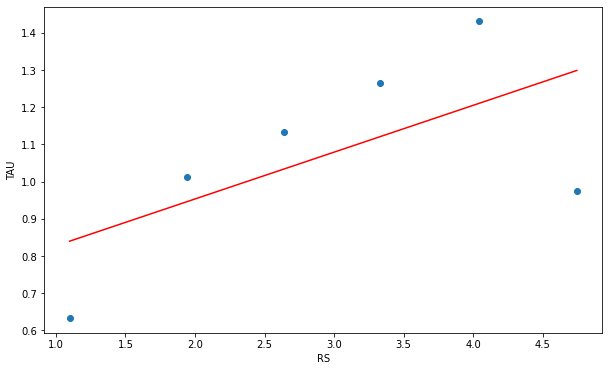

In [ ]:
model = LinearRegression()

X = pd.DataFrame(hurst_df.TAU)
y = pd.DataFrame(hurst_df.RS)

model.fit(X, y)

print('коэф. Херста : ', model.coef_)

plt.figure(figsize = (10,6))
plt.scatter(hurst_df.TAU, hurst_df.RS)

plt.plot(X, model.predict(X), color = 'red')

plt.xlabel('RS')
plt.ylabel('TAU')

# Метрика Fatalities по всему миру
Сделаем метрику Fatalities2Day - умершие за 1 день

# Расчет метрики

In [ ]:
df_date_flty = df.groupby('Date', as_index=False).sum()

In [ ]:
my_list = [1]
for x in range(1,115):
    k = df_date_flty['Fatalities'][x] - df_date_flty['Fatalities'][x-1]
    my_list.append(k)

In [ ]:
df_date_flty['Fatalities2Day'] = my_list

In [ ]:
df_date_flty 

,Date,Id,ConfirmedCases,Fatalities,Fatalities2Day
0,2020-01-22,5615533,554.0,17.0,1.0
1,2020-01-23,5615846,653.0,18.0,1.0
2,2020-01-24,5616159,939.0,26.0,8.0
3,2020-01-25,5616472,1432.0,42.0,16.0
4,2020-01-26,5616785,2113.0,56.0,14.0
...,...,...,...,...,...
110,2020-05-11,5649963,4176589.0,286293.0,3619.0
111,2020-05-12,5650276,4260955.0,291924.0,5631.0
112,2020-05-13,5650589,4345950.0,297155.0,5231.0
113,2020-05-14,5650902,4440974.0,302370.0,5215.0


In [ ]:
df_date_flty['Date'] = pd.to_datetime(df_date_flty['Date'])

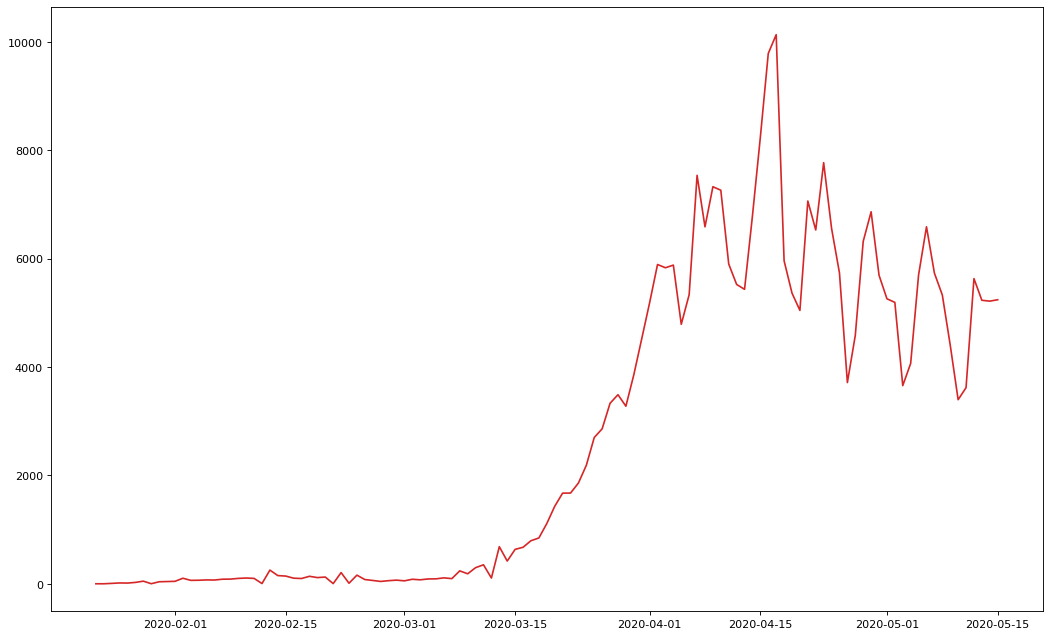

In [ ]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot(df_date_flty['Date'].values.astype('datetime64[D]'), df_date_flty['Fatalities2Day'].values , color='tab:red')
plt.show()

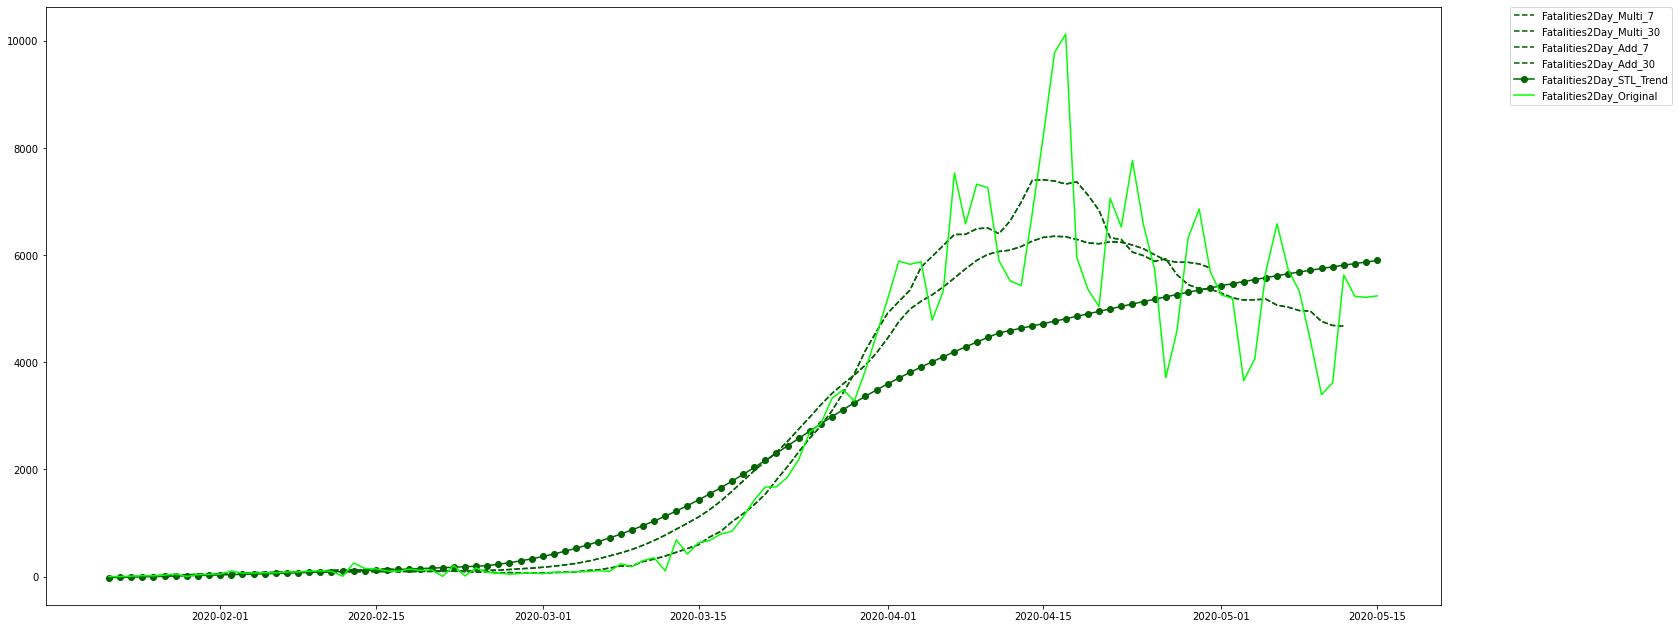

In [ ]:
dta = df_date_flty
dta = dta.set_index('Date')

# 1. Multiplicative 
# 1.1. Weekly
res_ymw = seasonal_decompose(dta['Fatalities2Day'], model='multiplicative', freq = 7)
# 1.2. Monthly
res_ymm = seasonal_decompose(dta['Fatalities2Day'], model='multiplicative', freq = 30)

# 2. Additive 
# 2.1. Weekly
res_yaw = seasonal_decompose(dta['Fatalities2Day'], model='additive', freq = 7)
# 2.2. Monthly
res_yam = seasonal_decompose(dta['Fatalities2Day'], model='additive', freq = 30)

# 3. STL-Lib Decompopsition by LOESS - Logistic Regression:
stl_y = decompose(dta[['Fatalities2Day']], period=7)


res_y = dta.Fatalities2Day


# Plotting Charts:
plt.figure(figsize=(25,11))
plt.plot(res_ymw.trend, '--', label='Fatalities2Day_Multi_7', color='darkgreen')
plt.plot(res_ymm.trend, '--', label='Fatalities2Day_Multi_30', color='darkgreen')
plt.plot(res_yaw.trend, '--', label='Fatalities2Day_Add_7', color='darkgreen')
plt.plot(res_yam.trend, '--', label='Fatalities2Day_Add_30', color='darkgreen')
plt.plot(stl_y.trend, '-o', label='Fatalities2Day_STL_Trend', color='darkgreen')

plt.plot(dta['Fatalities2Day'], '-', label='Fatalities2Day_Original', color='lime')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
test = sm.tsa.stattools.adfuller(dta.Fatalities2Day.values[3:-3] - res_ymw.trend.dropna())
print('adf: ', test[0]) 
print('p-value: ', test[1]) 
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Eсть единичные корни, ряд не стационарен') 
else:
    print('Eдиничных корней нет, ряд стационарен') 

adf:  -9.803894315013238
p-value:  5.895730261846627e-17
Critical values:  {'1%': -3.4954932834550623, '5%': -2.8900369024285117, '10%': -2.5819706975209726}
Eдиничных корней нет, ряд стационарен


MAPE :  3.45 %
MAE :  52.31396367257142


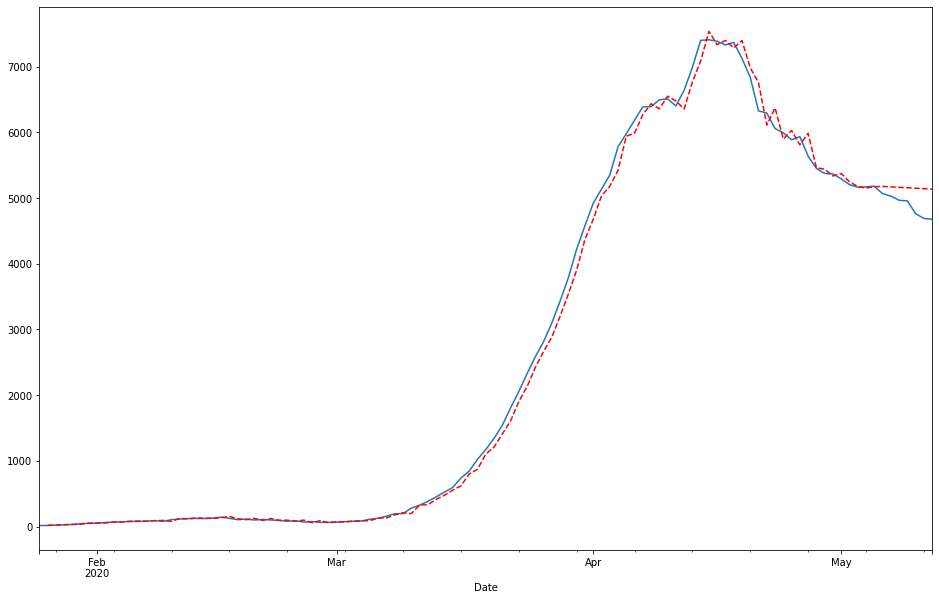

In [ ]:
src_data_model = res_ymw.trend['2020-01-25':'2020-05-05'].apply(lambda x: int(x))

model = sm.tsa.arima_model.ARIMA(src_data_model, (1,0,1))
model = model.fit()
model.predict(start='2020-04-25', end='2020-05-05')

from sklearn.metrics import r2_score
import ml_metrics as metrics

pred = model.predict('2020-01-26', '2020-05-12')
trn = res_ymw.trend['2020-01-25':'2020-05-11']

Error = np.sum(np.abs(np.subtract(trn,pred)))
Average = np.sum(trn)
MAPE = (Error/Average)*100


print('MAPE : ', str(round(MAPE, 2)), '%')
print('MAE : ', metrics.mae(trn[1:115], pred[1:115])) 

res_ymw.trend['2020-01-25':'2020-05-12'].apply(lambda x: int(x)).plot(figsize=(16,10))

pred.plot(style='r--')
plt.show()

# Показатель Херста

In [ ]:
hurst_df = pd.DataFrame() 
hurst_df['TAU'] = 0 
hurst_df['RS'] = 0

In [ ]:
def hurst(hurst_df, df):
    
    df = preparation(df)#убираем мусор
    main_df = df#копируем дата-фрейм
    my_range = range_hurst(df)
    for x in my_range: #перебираем TAU
        
        df = main_df
        df = row_number(df, shape = x)
        df_mean = df.groupby(['row_number']).mean()
        
        df_mean.rename(columns = {'Fatalities2Day': 'mean_Fatalities2Day'}, inplace = True)
        df = df.merge(df_mean, how='inner', left_on='row_number', right_on='row_number')
        
        #Накопленное знач.
        df['accumulated_value'] = df['Fatalities2Day'] - df['mean_Fatalities2Day']
        df = df[df['accumulated_value'] != 0]
        
        #Вычисляем R(размах)
        df_R_min = df.groupby(['row_number']).min()
        df_R_min = df_R_min.drop(['Fatalities2Day','mean_Fatalities2Day'], axis = 1)
        df_R_min.rename(columns = {'accumulated_value': 'R_min'}, inplace = True)
        df_R_max = df.groupby(['row_number']).max()
        df_R_max = df_R_max.drop(['Fatalities2Day','Fatalities2Day'], axis = 1)
        df_R_max.rename(columns = {'accumulated_value': 'R_max'}, inplace = True)
        df_R = df_R_max.merge(df_R_min, how='inner', left_on='row_number', right_on='row_number')
        df_R['R'] = df_R['R_max'] - df_R['R_min']
        df_R = df_R.drop(['R_max', 'R_min'], axis = 1)
        df = df.merge(df_R, how='inner', left_on='row_number', right_on='row_number')
        R = set(df['R'].to_numpy())#убираем дубликаты
        R = np.array(list(R))

        #Вычисляем std
        df_std = df.drop(['accumulated_value', 'R'], axis = 1)
        df_std = df_std.groupby(['row_number']).std()
        df_std.rename(columns = {'Fatalities2Day':'std'}, inplace = True)
        S = df_std['std'].to_numpy()
        
        RS = R.mean() / S.mean()
        print("---------------------------")
        print("TAU : ", x)
        print("Rmean : ", R.mean())
        print("Smean : ", S.mean())
        new_row = {'TAU': x, 'RS' : RS} 
        hurst_df  = hurst_df.append(new_row, ignore_index=True)

    return hurst_df  

In [ ]:
hurst_df = hurst(hurst_df, df_date_flty)

---------------------------
TAU :  115
Rmean :  10130.0
Smean :  2856.437451408004
---------------------------
TAU :  57
Rmean :  4932.5
Smean :  1067.0007699497296
---------------------------
TAU :  28
Rmean :  2898.6
Smean :  812.2333848501311
---------------------------
TAU :  14
Rmean :  1954.4444444444443
Smean :  592.1591542504445
---------------------------
TAU :  7
Rmean :  1467.1764705882354
Smean :  528.4200785811214
---------------------------
TAU :  3
Rmean :  715.8333333333334
Smean :  355.8624181188785


In [ ]:
hurst_df.TAU = list(map(lambda x : m.log(x), hurst_df.TAU))
hurst_df.RS = list(map(lambda x : m.log(x), hurst_df.RS))

коэф. Херста :  [[0.1782137]]


Text(0, 0.5, 'TAU')

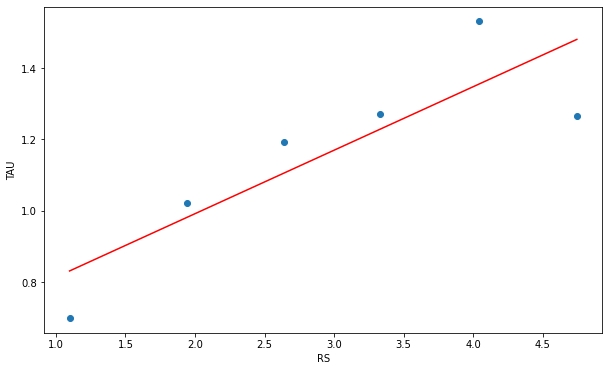

In [ ]:
model = LinearRegression()

X = pd.DataFrame(hurst_df.TAU)
y = pd.DataFrame(hurst_df.RS)

model.fit(X, y)

print('коэф. Херста : ', model.coef_)

plt.figure(figsize = (10,6))
plt.scatter(hurst_df.TAU, hurst_df.RS)

plt.plot(X, model.predict(X), color = 'red')

plt.xlabel('RS')
plt.ylabel('TAU')